<a href="https://colab.research.google.com/github/Jayanfrancis/Python_Project/blob/main/Recall_data_html.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 30)

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
project_directory = '/content/drive/MyDrive/DAB103_Project'

In [ ]:
df = pd.read_csv(project_directory+'/Recalls_Data.csv')

In [ ]:
df.shape

(26776, 14)

In [ ]:
df.head().sample(5)

,Report Received Date,NHTSA ID,Recall Link,Manufacturer,Subject,Component,Mfr Campaign Number,Recall Type,Potentially Affected,Recall Description,Consequence Summary,Corrective Action,Park Outside Advisory,Do Not Drive Advisory
1,03/10/2023,23V162000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Ford Motor Company,Front Brake Hoses May Rupture,"SERVICE BRAKES, HYDRAULIC",23S12,Vehicle,"1,280,726.00",Ford Motor Company (Ford) is recalling certain...,A brake fluid leak will increase brake pedal t...,"Dealers will replace the front brake hoses, fr...",No,No
2,03/10/2023,23V160000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Ford Motor Company,Inoperative Trailer Taillights/FMVSS 108,EXTERIOR LIGHTING,23C04,Vehicle,"2,716.00",Ford Motor Company (Ford) is recalling certain...,Trailer taillights that do not illuminate as i...,Dealers will add an electrical circuit to the ...,No,No
3,03/10/2023,23V164000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Ford Motor Company,Rear Caliper Bolts Not Tightened Correctly,"SERVICE BRAKES, HYDRAULIC",23S11,Vehicle,644.00,Ford Motor Company (Ford) is recalling certain...,A damaged wheel can result in a loss of tire p...,Dealers will inspect and tighten the rear cali...,No,No
0,03/10/2023,23V161000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Kibbi, LLC",Entry Door Latch Failure,LATCHES/LOCKS/LINKAGES,NR (Not Reported),Vehicle,63.00,"Kibbi, LLC (Kibbi) is recalling certain 2022-2...",The inability to enter or exit the vehicle in ...,Dealers will inspect and replace the door latc...,No,No
4,03/10/2023,23V165000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Ford Motor Company,Rearview Camera Malfunction/FMVSS 111,BACK OVER PREVENTION,23C05,Vehicle,"1,651.00",Ford Motor Company (Ford) is recalling certain...,A rearview image that continues to be displaye...,The SYNC module software will be updated by a ...,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26776 entries, 0 to 26775
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Report Received Date    26776 non-null  object 
 1   NHTSA ID                26776 non-null  object 
 2   Recall Link             26776 non-null  object 
 3   Manufacturer            26776 non-null  object 
 4   Subject                 26776 non-null  object 
 5   Component               26776 non-null  object 
 6   Mfr Campaign Number     26747 non-null  object 
 7   Recall Type             26776 non-null  object 
 8   Potentially Affected    26733 non-null  float64
 9   Recall Description      24375 non-null  object 
 10  Consequence Summary     21888 non-null  object 
 11  Corrective Action       24388 non-null  object 
 12  Park Outside Advisory   26776 non-null  object 
 13  Do Not Drive Advisory   26776 non-null  object 
dtypes: float64(1), object(13)
memory usage

In [ ]:
print(df['NHTSA ID'].nunique())

26776


In [ ]:
df['Potentially Affected'].describe()

count       26,733.00
mean        46,267.50
std        382,286.20
min              0.00
25%            102.00
50%            702.00
75%          6,475.00
max     32,000,000.00
Name: Potentially Affected, dtype: float64

In [ ]:
df['Report Received Date'] = pd.to_datetime(df['Report Received Date'])

In [ ]:
df['year'] = df['Report Received Date'].dt.year

In [ ]:
#print(df['year'])

In [ ]:
df = df[df.columns[1:].append(df.columns[:1])]

In [ ]:
df.set_index('NHTSA ID', inplace=True)

In [ ]:
df.sample(5)

,Recall Link,Manufacturer,Subject,Component,Mfr Campaign Number,Recall Type,Potentially Affected,Recall Description,Consequence Summary,Corrective Action,Park Outside Advisory,Do Not Drive Advisory,year,Report Received Date
NHTSA ID,,,,,,,,,,,,,,
90V186000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,HOLIDAY RAMBLER CORP.,SUSPENSION:INDEPENDENT FRONT ATTACHING MECHANI...,SUSPENSION,NR (Not Reported),Vehicle,336.00,THE SUSPENSION COIL SPRING BOX MOUNTING BRACKE...,BRACKET FAILURE ALLOWS THE COIL SPRING BOX TO ...,REPAIR TO PREVENT MOUNTING BRACKET FAILURE.,No,No,1990,1990-10-19
17V393000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Mazda North American Operations,Parking Brake Actuators may Corrode,PARKING BRAKE,1217F,Vehicle,"227,814.00",Mazda North American Operations (Mazda) is rec...,"If the parking brake actuator shaft binds, the...","Mazda will notify owners, and dealers will che...",No,No,2017,2017-06-22
22E102000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Hendrickson USA. L.L.C.,Loose Brake Pad Retaining Clip May Damage Tire,"SERVICE BRAKES, AIR",NR (Not Reported),Equipment,12.00,"Hendrickson USA, L.L.C. (Hendrickson) is recal...",A retaining clip or bracket that detaches can ...,All affected VanTraxx assemblies have been ins...,No,No,2022,2022-12-29
16V647000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Volkswagen Group of America, Inc.",Suction Pump may Allow Fuel into the EVAP System,ENGINE AND ENGINE COOLING,20Y6/20Y5,Vehicle,"110,042.00","Volkswagen Group of America, Inc. (Volkswagen)...","As fuel accumulates in the EVAP system, it may...","Volkswagen will notify owners, and dealers wil...",No,No,2016,2016-09-07
20V075000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Forest River, Inc.",Spare Tire Carrier U-bolts May Fail,EQUIPMENT,51-1133,Vehicle,"4,464.00","Forest River, Inc. (Forest River) is recalling...",If the spare tire carrier and spare tire detac...,"Forest River will notify owners, and dealers w...",No,No,2020,2020-02-12


In [ ]:
print(df['Component'].unique())
len((df['Component'].unique()))

['LATCHES/LOCKS/LINKAGES' 'SERVICE BRAKES, HYDRAULIC' 'EXTERIOR LIGHTING'
 'BACK OVER PREVENTION' 'VISIBILITY' 'ELECTRICAL SYSTEM' 'SEAT BELTS'
 'AIR BAGS' 'EQUIPMENT' 'POWER TRAIN' 'STRUCTURE' 'STEERING' 'TIRES'
 'SUSPENSION' 'CHILD SEAT' 'PARKING BRAKE' 'SEATS' 'TRAILER HITCHES'
 'SERVICE BRAKES' 'ENGINE AND ENGINE COOLING' 'SERVICE BRAKES, AIR'
 'EQUIPMENT ADAPTIVE/MOBILITY' 'FUEL SYSTEM, GASOLINE'
 'ELECTRONIC STABILITY CONTROL' 'WHEELS' 'FUEL SYSTEM, DIESEL' 'ENGINE'
 'FUEL SYSTEM, OTHER' 'HYBRID PROPULSION SYSTEM'
 'FORWARD COLLISION AVOIDANCE' 'COMMUNICATION' 'VEHICLE SPEED CONTROL'
 'OTHER' 'LANE DEPARTURE' 'UNKNOWN OR OTHER' 'VISIBILITY/WIPER'
 'TRACTION CONTROL SYSTEM' 'SERVICE BRAKES, ELECTRIC' 'INTERIOR LIGHTING'
 'TBD']


40

In [ ]:
print(df['Manufacturer'].unique())
len((df['Manufacturer'].unique()))

['Kibbi, LLC' 'Ford Motor Company' 'Gilbarco, Inc.' ... 'SS AUTOS, INC.'
 'ALGAR ENTERPRISES, INC.' 'ULTRA, INC.']


2941

In [ ]:
df = df[(df['year'] >= 2010) & (df['year'] <= 2023)]
df.shape

(11724, 14)

In [ ]:
print(df['Manufacturer'].unique())
len((df['Manufacturer'].unique()))

['Kibbi, LLC' 'Ford Motor Company' 'Gilbarco, Inc.' ...
 'Chrysler Group Global Electric Motorcars' 'General Coach America, Inc.'
 'TRAILMANOR, INC.']


1364

In [ ]:
df.nunique()


Recall Link               11724
Manufacturer               1364
Subject                    8179
Component                    40
Mfr Campaign Number        7060
Recall Type                   4
Potentially Affected       5096
Recall Description        11708
Consequence Summary        8215
Corrective Action         11645
Park Outside Advisory         2
Do Not Drive Advisory         2
year                         14
Report Received Date       3040
dtype: int64

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11724 entries, 23V161000 to 10V005000
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Recall Link             11724 non-null  object        
 1   Manufacturer            11724 non-null  object        
 2   Subject                 11724 non-null  object        
 3   Component               11724 non-null  object        
 4   Mfr Campaign Number     11695 non-null  object        
 5   Recall Type             11724 non-null  object        
 6   Potentially Affected    11719 non-null  float64       
 7   Recall Description      11724 non-null  object        
 8   Consequence Summary     11724 non-null  object        
 9   Corrective Action       11724 non-null  object        
 10  Park Outside Advisory   11724 non-null  object        
 11  Do Not Drive Advisory   11724 non-null  object        
 12  year                    11724 non-null 

In [ ]:
df.sample(2)

,Recall Link,Manufacturer,Subject,Component,Mfr Campaign Number,Recall Type,Potentially Affected,Recall Description,Consequence Summary,Corrective Action,Park Outside Advisory,Do Not Drive Advisory,year,Report Received Date
NHTSA ID,,,,,,,,,,,,,,
13V084000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Volvo Car USA, LLC",Information Labels/Part 567,EQUIPMENT,NR (Not Reported),Vehicle,7.00,Volvo is recalling certain model year 2013 S60...,With an incorrect date of manufacture on the c...,Volvo has quarantined the affected vehicles an...,No,No,2013,2013-03-05
14V481000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Chrysler (FCA US, LLC)",Knee Air Bag may Deploy Improperly/FMVSS 208,AIR BAGS,P42,Vehicle,"25,479.00",Chrysler Group LLC (Chrysler) is recalling cer...,If the knee airbag air bag does not deploy pro...,"Chrysler will notify owners, and dealers will ...",No,No,2014,2014-08-06


In [ ]:
print(df.isnull().sum())

Recall Link                0
Manufacturer               0
Subject                    0
Component                  0
Mfr Campaign Number       29
Recall Type                0
Potentially Affected       5
Recall Description         0
Consequence Summary        0
Corrective Action          0
Park Outside Advisory      0
Do Not Drive Advisory      0
year                       0
Report Received Date       0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11724 entries, 23V161000 to 10V005000
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Recall Link             11724 non-null  object        
 1   Manufacturer            11724 non-null  object        
 2   Subject                 11724 non-null  object        
 3   Component               11724 non-null  object        
 4   Mfr Campaign Number     11695 non-null  object        
 5   Recall Type             11724 non-null  object        
 6   Potentially Affected    11719 non-null  float64       
 7   Recall Description      11724 non-null  object        
 8   Consequence Summary     11724 non-null  object        
 9   Corrective Action       11724 non-null  object        
 10  Park Outside Advisory   11724 non-null  object        
 11  Do Not Drive Advisory   11724 non-null  object        
 12  year                    11724 non-null 

In [ ]:
df.iloc[:, 10] = df.iloc[:, 10].astype('category')

In [ ]:
df.iloc[:, 11] = df.iloc[:, 11].astype('category')

In [ ]:
Park_Outside = df.iloc[:, 10]
DoNot_Drive  = df.iloc[:, 11]

In [ ]:
Recall_data = df

In [ ]:
Recall_data = Recall_data.drop(['Recall Link', 'Subject','Mfr Campaign Number','Recall Description','Consequence Summary','Corrective Action','Report Received Date'], axis=1)

In [ ]:
print(Recall_data.isnull().sum())
Recall_data.shape

Manufacturer              0
Component                 0
Recall Type               0
Potentially Affected      5
Park Outside Advisory     0
Do Not Drive Advisory     0
year                      0
dtype: int64


(11724, 7)

In [ ]:
Recall_data.dropna(subset=['Potentially Affected'], inplace=True)
print(Recall_data.isnull().sum())
Recall_data.shape

Manufacturer              0
Component                 0
Recall Type               0
Potentially Affected      0
Park Outside Advisory     0
Do Not Drive Advisory     0
year                      0
dtype: int64


(11719, 7)

In [ ]:
Recall_data.sample(3)

,Manufacturer,Component,Recall Type,Potentially Affected,Park Outside Advisory,Do Not Drive Advisory,year
NHTSA ID,,,,,,,
21E009000,"Cummins, Inc.",ENGINE,Equipment,251.00,No,No,2021
21V540000,"ShowHauler Trucks, Inc.",EQUIPMENT,Vehicle,44.00,No,No,2021
16V532000,"Tiffin Motorhomes, Inc.",VISIBILITY,Vehicle,"10,351.00",No,No,2016


In [ ]:
Recall_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11719 entries, 23V161000 to 10V005000
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Manufacturer            11719 non-null  object  
 1   Component               11719 non-null  object  
 2   Recall Type             11719 non-null  object  
 3   Potentially Affected    11719 non-null  float64 
 4   Park Outside Advisory   11719 non-null  category
 5   Do Not Drive Advisory   11719 non-null  category
 6   year                    11719 non-null  int64   
dtypes: category(2), float64(1), int64(1), object(3)
memory usage: 572.5+ KB


In [ ]:
Recall_data.nunique()

Manufacturer              1363
Component                   40
Recall Type                  4
Potentially Affected      5096
Park Outside Advisory        2
Do Not Drive Advisory        2
year                        14
dtype: int64

In [ ]:
Recall_data1 = Recall_data[['Potentially Affected','year']].groupby(by=['year']).count().rename(columns={'Potentially Affected':'No_OfTimeRecalls'})



Text(0.5, 0, 'year')

Text(0, 0.5, 'No_OfTimeRecalls')

Text(0.5, 1.0, 'Number of times Recall over the last 10 years')

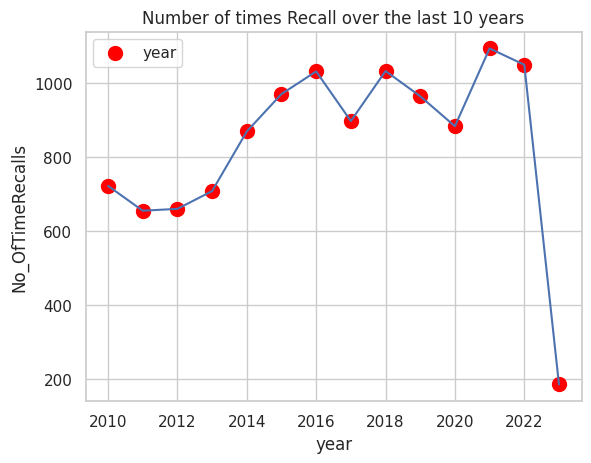

In [ ]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
ax.plot(Recall_data1)
ax.set_xlabel('year')
ax.set_ylabel('No_OfTimeRecalls')
ax.set_title('Number of times Recall over the last 10 years')
ax.scatter(Recall_data1.index, Recall_data1, color='red', marker='o', s=100, label='year')
ax.legend()


plt.show()

In [ ]:
Recall_data2 = Recall_data[['Potentially Affected','Manufacturer']].groupby(by=['Manufacturer']).count().sort_values(by='Potentially Affected',ascending=False).rename(columns={'Potentially Affected':'No_OfTimeRecalls'})
Recall_data3 = Recall_data2.head(10)


Text(0, 0.5, 'No. of Time Recalls')

Text(0.5, 0, 'Manufacturer')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Ford Motor Company'),
  Text(1, 0, 'Forest River, Inc.'),
  Text(2, 0, 'Chrysler (FCA US, LLC)'),
  Text(3, 0, 'Daimler Trucks North America, LLC'),
  Text(4, 0, 'General Motors, LLC'),
  Text(5, 0, 'Mercedes-Benz USA, LLC'),
  Text(6, 0, 'BMW of North America, LLC'),
  Text(7, 0, 'Volkswagen Group of America, Inc.'),
  Text(8, 0, 'Navistar, Inc.'),
  Text(9, 0, 'Honda (American Honda Motor Co.)')])

Text(0.5, 1.0, 'Top 10 Highest Number of times Recall with respect to Manufacture ')

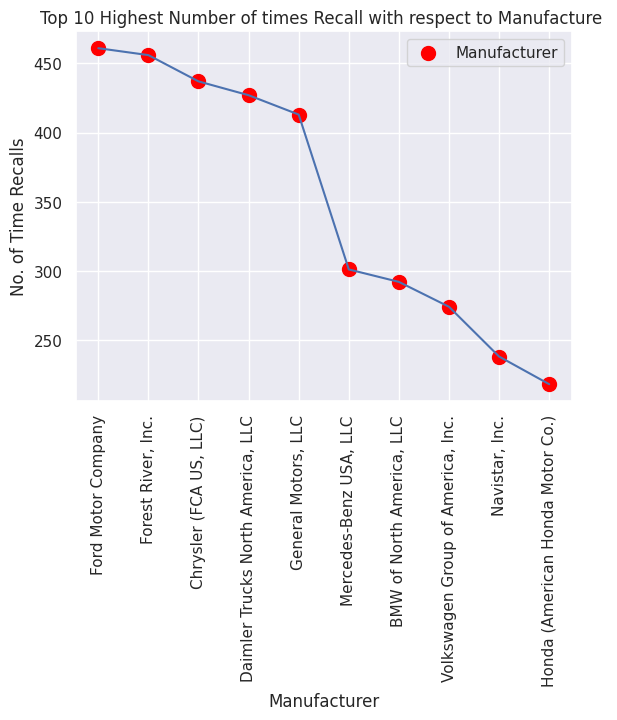

In [ ]:
sns.set_style('darkgrid')
fig, ax = plt.subplots()
ax.plot(Recall_data3)
ax.set_ylabel('No. of Time Recalls')
ax.set_xlabel('Manufacturer')
plt.xticks(rotation=90)
ax.set_title('Top 10 Highest Number of times Recall with respect to Manufacture ')

ax.scatter(Recall_data3.index, Recall_data3, color='red', marker='o', s=100, label='Manufacturer')
ax.legend()
plt.show()




## **How many recalls over the last 10 years based on the components? **

In [ ]:
current_year = 2023
last10Years = Recall_data[Recall_data['year'] >= current_year - 10]


last10Years = last10Years.groupby([ 'Component','year']).agg({'Potentially Affected': 'sum'}).reset_index()

last10Years_data = last10Years.sort_values('Potentially Affected', ascending=False) # Arraging the data in Increasing order for most Affected vechile 



last10Years_data['year'] = last10Years_data['year'].astype('category')


top20_data = last10Years_data.head(20)
#top20_data





<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='Component', ylabel='count'>

Text(0.5, 0, 'Component')

Text(0, 0.5, 'Count')

([], [])

Text(0.5, 1.0, 'Highest Recall Count by  Component (Last 10 Years)')

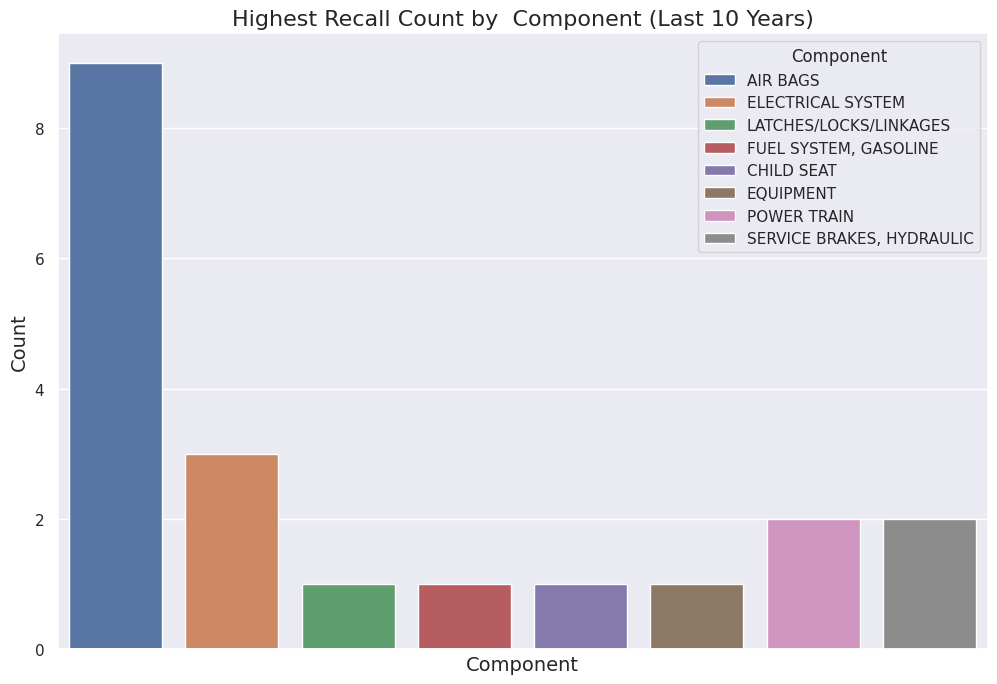

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))
sns.countplot( x='Component',  hue="Component",  data=top20_data, width=0.8, dodge=False )
plt.xlabel('Component', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([])
plt.title('Highest Recall Count by  Component (Last 10 Years)', fontsize=16)


plt.show()




In [ ]:

#top20_data

top20_data['Potentially Affected'] = top20_data['Potentially Affected'].astype('int')


<ipython-input-245-52a6d4bb53c7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top20_data['Potentially Affected'] = top20_data['Potentially Affected'].astype('int')


<ipython-input-246-23cb564be328>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top20_data['Potentially Affected'] = top20_data['Potentially Affected'] / 100000


<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='year', ylabel='Potentially Affected'>

Text(0, 0.5, 'Potentially Affected Vehical per One Hundred Thousand(lakhs) ')

Text(0.5, 0, 'Years')

Text(0.5, 1.0, 'Potentially Affected by Component and Year')

(0.0, 700.0)

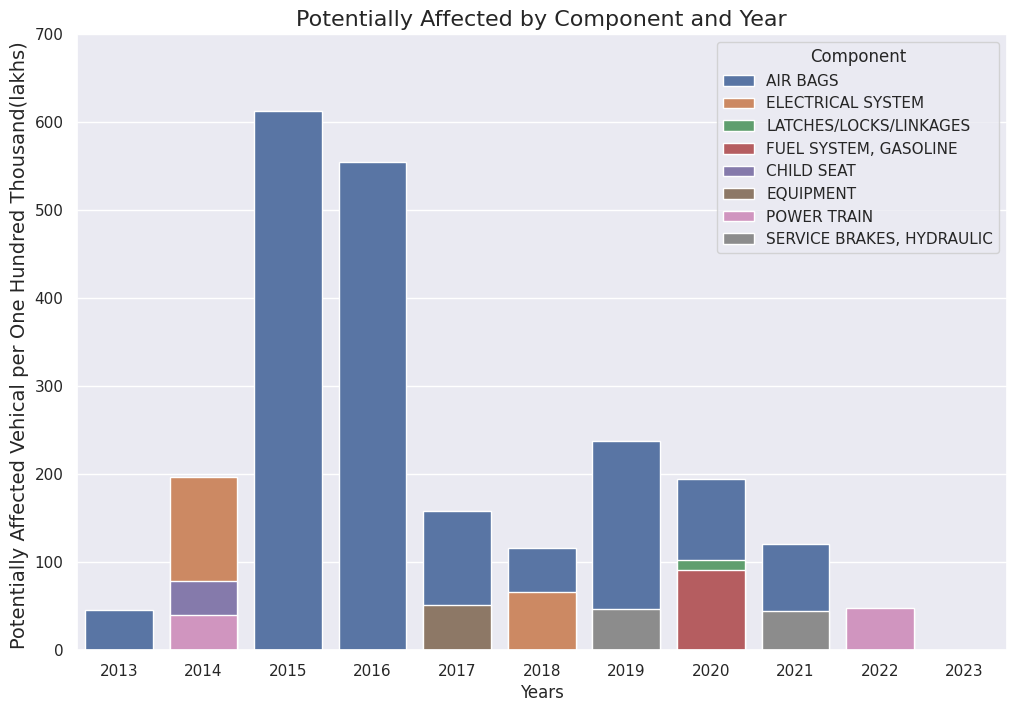

In [ ]:
#sns.barplot(data=top10_data, x='year', y='Potentially Affected', hue='Component', dodge=False )
top20_data['Potentially Affected'] = top20_data['Potentially Affected'] / 100000

y_min = 0
y_max = 700

plt.figure(figsize=(12, 8))
sns.barplot(data=top20_data, x='year', y='Potentially Affected', hue='Component', dodge=False, width=0.8)
plt.ylabel('Potentially Affected Vehical per One Hundred Thousand(lakhs) ',fontsize=14)
plt.xlabel('Years')
plt.title('Potentially Affected by Component and Year', fontsize=16)
sns.set(style="darkgrid")

plt.ylim(y_min, y_max)
    
plt.show()

<Figure size 800x800 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7f93f40a4eb0>,
 [Text(-1.086457168210212, 0.17207795223283895, 'AIR BAGS'),
  Text(0.17207785051137656, -1.086457184321308, 'ELECTRICAL SYSTEM'),
  Text(0.8899186726249572, -0.6465638066837909, 'LATCHES/LOCKS/LINKAGES'),
  Text(1.0999999999999999, -2.574735820401356e-08, 'FUEL SYSTEM, GASOLINE'),
  Text(0.9801071847895437, 0.49938953365475675, 'CHILD SEAT'),
  Text(0.7778174684082686, 0.7778174502021361, 'EQUIPMENT'),
  Text(0.4993895565958212, 0.9801071731004877, 'POWER TRAIN'),
  Text(0.17207791408729092, 1.086457174251874, 'SERVICE BRAKES, HYDRAULIC')],
 [Text(-0.5926130008419338, 0.09386070121791214, '45.0%'),
  Text(0.0938606457334781, -0.5926130096298043, '15.0%'),
  Text(0.4854101850681584, -0.3526711672820677, '10.0%'),
  Text(0.5999999999999999, -1.4044013565825577e-08, '10.0%'),
  Text(0.5346039189761147, 0.2723942910844127, '5.0%'),
  Text(0.42426407367723734, 0.4242640637466196, '5.0%'),
  Text(0.2723943035977206, 0.534603912600266, '5.0%'),

Text(0.5, 1.0, 'Distribution of Number of Component Recall over last 10 Year')

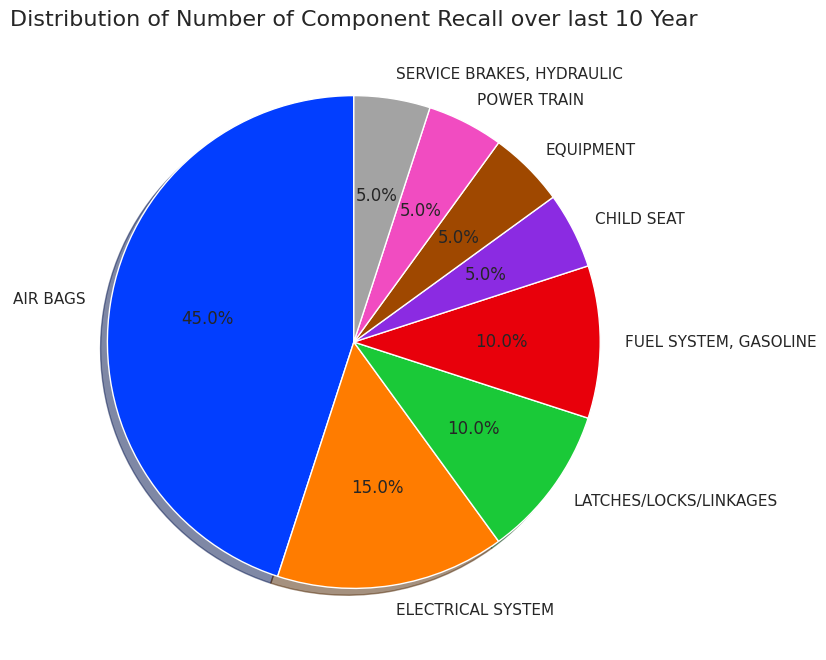

In [ ]:
components = top20_data['Component']


sns.set_theme()
colors = sns.color_palette('bright')
plt.figure(figsize=(8, 8))
plt.pie(components.value_counts(), labels=components.unique(), autopct='%1.1f%%', colors=colors, startangle=90, shadow=True)
plt.title('Distribution of Number of Component Recall over last 10 Year', fontsize=16)
plt.show()

### **Who are the top cars manufacturer which gets the highest recall over the last ten years? **

In [ ]:
current_year = 2023
manufacturer10Years = Recall_data[Recall_data['year'] >= current_year - 10]


manufacturerData = manufacturer10Years.groupby([ 'Manufacturer','year']).agg({'Potentially Affected': 'sum'}).reset_index()

manufacturerData_years = manufacturerData.sort_values('Potentially Affected', ascending=False) # Arraging the data in decreasing order for most Affected vechile 



manufacturerData_years['year'] = manufacturerData_years['year'].astype('category')
manufacturerData_years['Potentially Affected'] = manufacturerData_years['Potentially Affected'].astype('int')

topManufacturer_data = manufacturerData_years.head(20)
#topManufacturer_data



<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='Manufacturer', ylabel='Count'>

Text(0, 0.5, 'Number of Counts ')

Text(0.5, 0, 'Manufacturer Recalls')

Text(0.5, 1.0, 'Top Manufacturer for Recalls over last 10 years')

([], [])

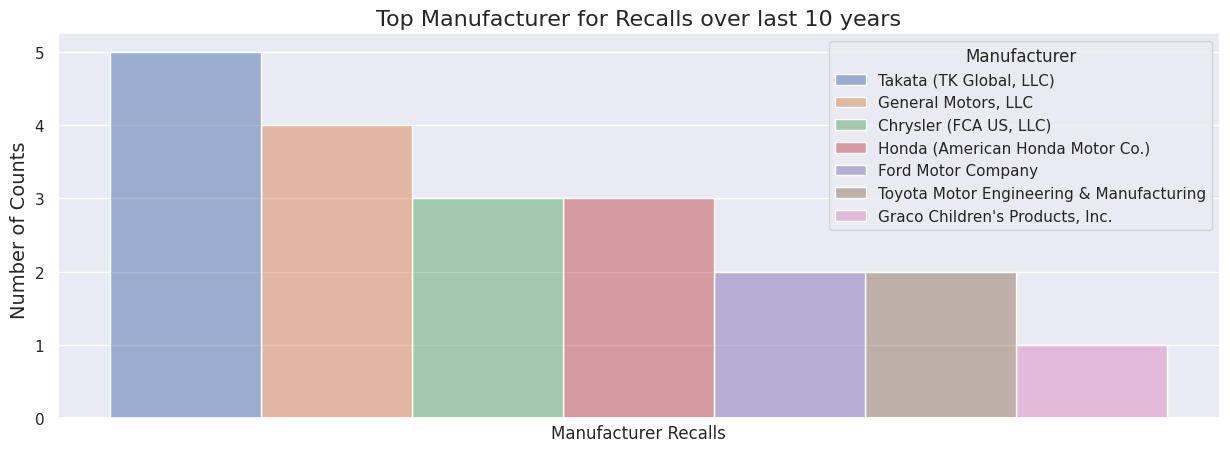

In [ ]:




plt.figure(figsize=(15,5))
sns.histplot(data = topManufacturer_data, x = 'Manufacturer', hue = 'Manufacturer') 
plt.ylabel('Number of Counts ',fontsize=14)
plt.xlabel('Manufacturer Recalls')
plt.title('Top Manufacturer for Recalls over last 10 years', fontsize=16)
sns.set(style="darkgrid")
plt.xticks([])


plt.show()

<ipython-input-250-351ac56da109>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topManufacturer_data['Potentially Affected'] = topManufacturer_data['Potentially Affected'] / 100000


<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='year', ylabel='Potentially Affected'>

(0.0, 700.0)

(0.0, 500.0)

Text(0, 0.5, ' Vehical per One Hundred Thousand(lakhs) ')

Text(0.5, 0, 'Years')

Text(0.5, 1.0, 'Top Recalls Manufacturer over past 10 years')

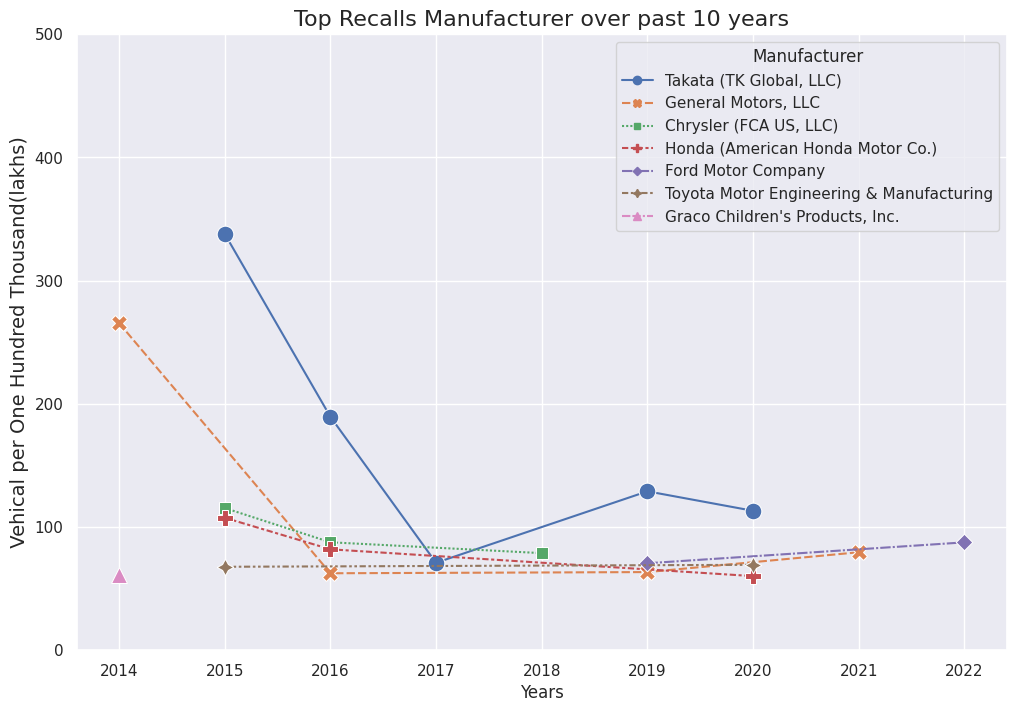

In [ ]:
topManufacturer_data['Potentially Affected'] = topManufacturer_data['Potentially Affected'] / 100000

plt.figure(figsize=(12, 8))
sns.lineplot(data = topManufacturer_data, x ='year', y = 'Potentially Affected',hue = 'Manufacturer', style = 'Manufacturer', markers = True, err_style=None,markersize=12) 
plt.ylim(y_min, y_max)
plt.ticklabel_format(useOffset = False)
y_min = 0  
y_max = 500
plt.ylim(y_min, y_max)
plt.ylabel(' Vehical per One Hundred Thousand(lakhs) ',fontsize=14)
plt.xlabel('Years')
plt.title('Top Recalls Manufacturer over past 10 years', fontsize=16)


plt.ticklabel_format(useOffset=False)

plt.show()

## **What are the components and areas (Recall Type) in which the highest recall has been observed over the past ten years? **

In [ ]:



highestRecall = Recall_data.groupby([ 'Recall Type','year']).agg({'Potentially Affected': 'sum'}).reset_index()

highestRecall_data = highestRecall.sort_values('Potentially Affected', ascending=False) 



highestRecall_data['year'] = highestRecall_data['year'].astype('category')



highestRecall_d = highestRecall_data.head(20)
#highestRecall_d

<ipython-input-252-a308aca4a8bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highestRecall_d['Potentially Affected'] = highestRecall_d['Potentially Affected'] / 100000


<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='year', ylabel='Potentially Affected'>

Text(0, 0.5, 'Vehical per One Hundred Thousand(lakhs) ')

Text(0.5, 0, 'Years')

Text(0.5, 1.0, 'Vehicle Affected by Recall Type and Year')

(0.0, 600.0)

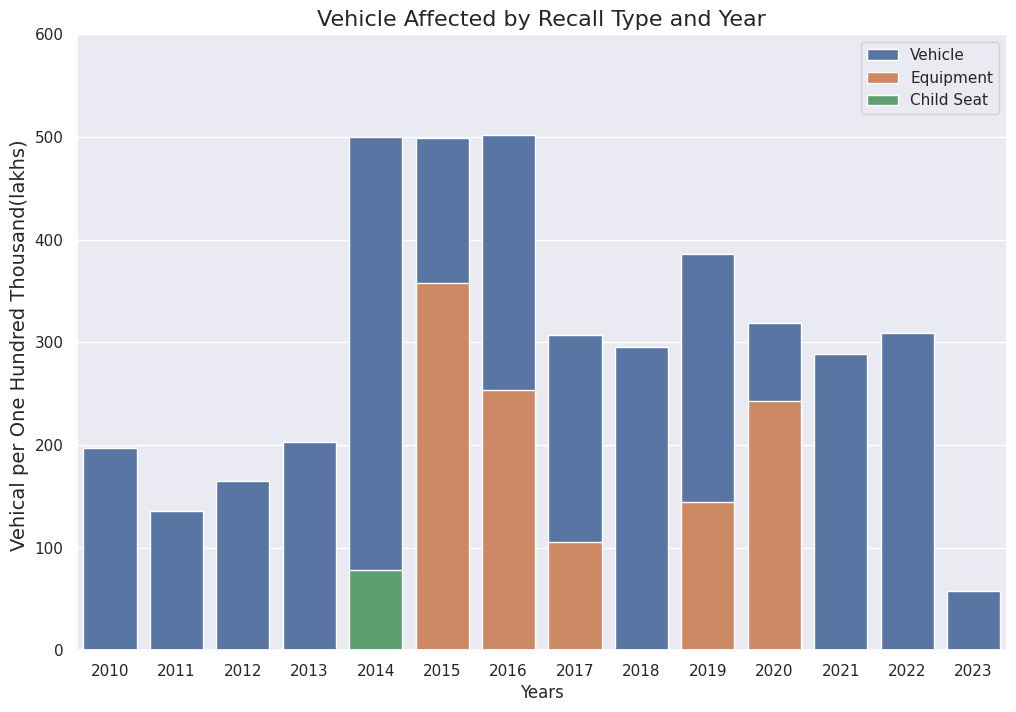

In [ ]:
highestRecall_d['Potentially Affected'] = highestRecall_d['Potentially Affected'] / 100000

y_min = 0
y_max = 600

plt.figure(figsize=(12, 8))
sns.barplot(data=highestRecall_d, x='year', y='Potentially Affected', hue='Recall Type', dodge=False, width=0.8)
plt.ylabel('Vehical per One Hundred Thousand(lakhs) ',fontsize=14)
plt.xlabel('Years')
plt.title('Vehicle Affected by Recall Type and Year', fontsize=16)
plt.legend(loc='upper right') 
sns.set(style="darkgrid")

plt.ylim(y_min, y_max)
    
plt.show()

<Figure size 800x800 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7f93b11c6220>,
 [Text(-0.8899187180267097, -0.6465637441936393, 'Vehicle'),
  Text(0.9801072140121815, 0.49938947630209435, 'Equipment'),
  Text(0.1720779903783871, 1.0864571621685486, 'Child Seat')],
 [Text(-0.48541020983275074, -0.3526711331965305, '70.0%'),
  Text(0.5346039349157353, 0.27239425980114235, '25.0%'),
  Text(0.09386072202457478, 0.592612997546481, '5.0%')])

Text(0.5, 1.0, 'Distribution of Number of recallType over last 10 Year')

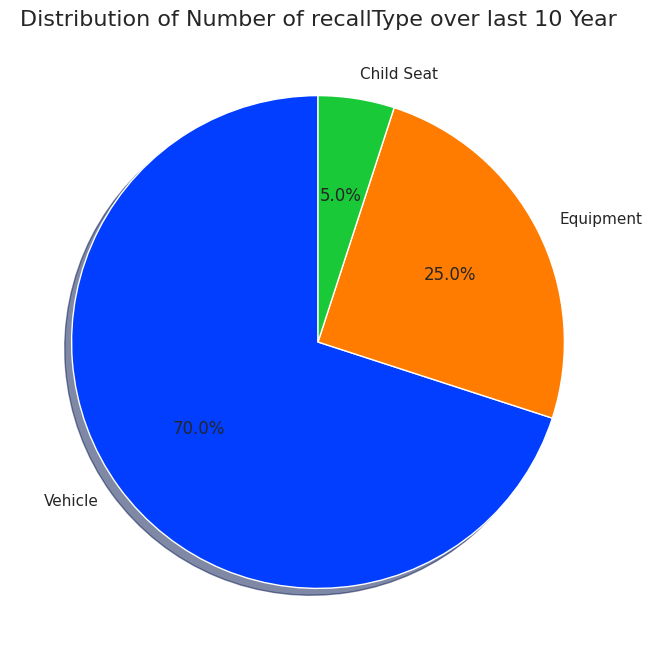

In [ ]:
recallType = highestRecall_d['Recall Type']


sns.set_theme()
colors = sns.color_palette('bright')
plt.figure(figsize=(8, 8))
plt.pie(recallType.value_counts(), labels=recallType.unique(), autopct='%1.1f%%', colors=colors, startangle=90, shadow=True)
plt.title('Distribution of Number of recallType over last 10 Year', fontsize=16)
plt.show()

<Axes: xlabel='Recall Type', ylabel='Potentially Affected'>

Text(0, 0.5, 'Potentially Affected ')

Text(0.5, 0, 'Recall Type')

Text(0.5, 1.0, 'Distribution of Number of Recall Type ')

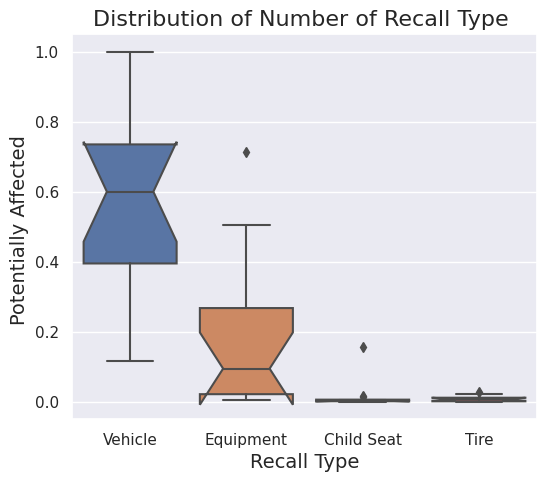

In [ ]:
highestRecall_data['Potentially Affected'] = (highestRecall_data['Potentially Affected'] - highestRecall_data['Potentially Affected'].min()) / (highestRecall_data['Potentially Affected'].max() - highestRecall_data['Potentially Affected'].min())


fig, ax = plt.subplots(figsize = (6, 5))
sns.boxplot(data=highestRecall_data, x='Recall Type', y='Potentially Affected',notch = True)
plt.ylabel('Potentially Affected ',fontsize=14)
plt.xlabel('Recall Type',fontsize=14)
plt.title('Distribution of Number of Recall Type ', fontsize=16)
plt.show()

<Axes: xlabel='year', ylabel='Potentially Affected'>

Text(0, 0.5, 'Potentially Affected ')

Text(0.5, 0, 'year')

Text(0.5, 1.0, 'Distribution of Number of Recall Type over the years ')

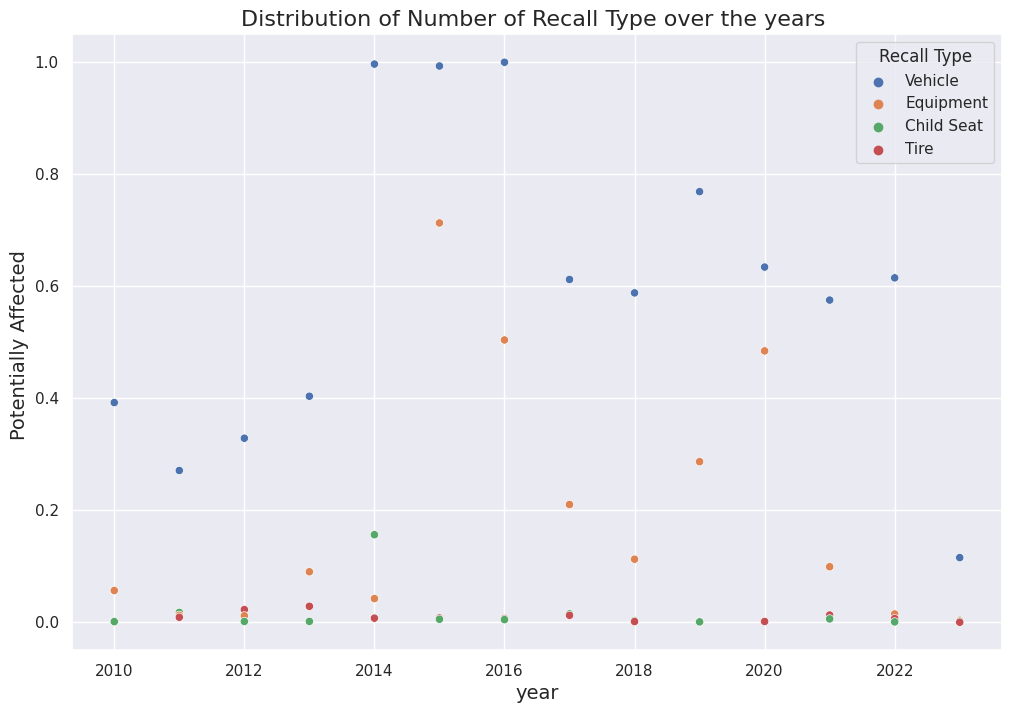

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.scatterplot(data = highestRecall_data, x = 'year', y = 'Potentially Affected', hue= 'Recall Type' )
plt.ylabel('Potentially Affected ',fontsize=14)
plt.xlabel('year',fontsize=14)
plt.title('Distribution of Number of Recall Type over the years ', fontsize=16)

plt.show()

Text(45.084999999999994, 0.5, 'Potentially Affected ')

Text(0.5, 35.99999999999997, 'year')

Text(0.5, 1.0, 'Distribution of Number of Recall Type over the years ')

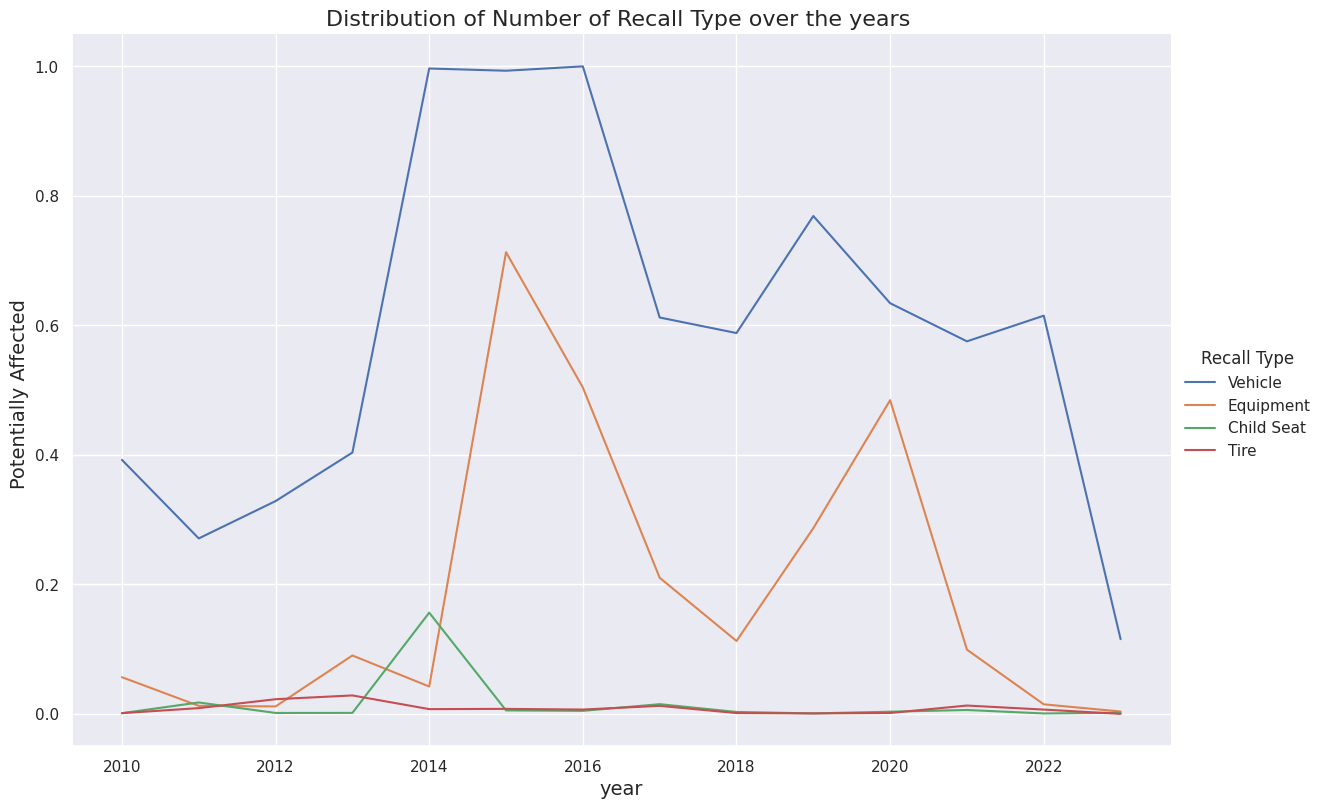

In [ ]:
sns.relplot(data=highestRecall_data, x='year', y='Potentially Affected', hue='Recall Type', kind='line', height=8, aspect=1.5)
plt.ylabel('Potentially Affected ',fontsize=14)
plt.xlabel('year',fontsize=14)
plt.title('Distribution of Number of Recall Type over the years ', fontsize=16)

plt.show()

## What has been a trend for car recall over the last 10 years **bold text**

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='year', ylabel='Potentially Affected'>

Text(0, 0.5, 'Number of Recall ')

Text(0.5, 0, 'Years')

Text(0.5, 1.0, 'Trend for car recall over the last 10 years')

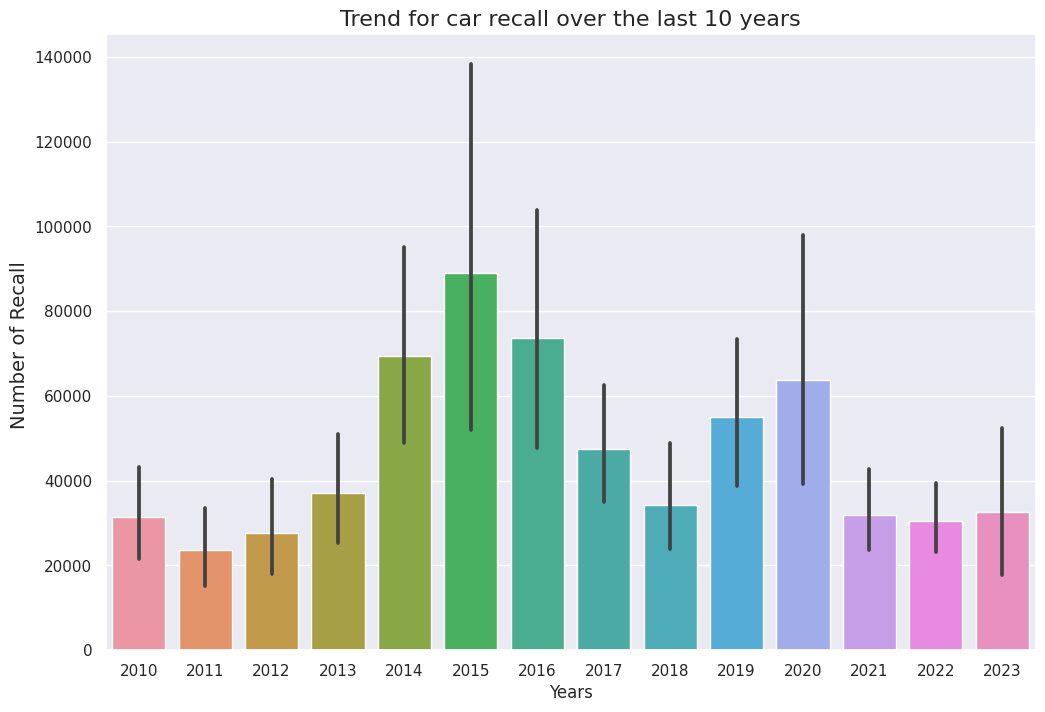

In [ ]:
Recall_data_new = Recall_data
Recall_data_new['year'] = Recall_data_new['year'].astype('int')


plt.figure(figsize=(12, 8))
sns.barplot(data=Recall_data_new, x='year', y='Potentially Affected', dodge=False, width=0.8)
plt.ylabel('Number of Recall ',fontsize=14)
plt.xlabel('Years')
plt.title('Trend for car recall over the last 10 years', fontsize=16)



plt.show()

Reference Links -

## 1. https://seaborn.pydata.org/
## 2. https://campus.datacamp.com/courses/exploratory-data-analysis-in-python/data-cleaning-and-imputation?ex=1
## 3.https://www.youtube.com/watch?v=-o3AxdVcUtQ
## 4. https://matplotlib.org/stable/tutorials/introductory/pyplot.html **bold text** **bold text**


